In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [8]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [10]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y= car_dataset['Selling_Price']

In [15]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [16]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=2)

In [18]:
# loading the linear regression model
lr= LinearRegression()

# traning the model

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
# prediction on Testing data
y_prd = lr.predict(X_test)

In [21]:
y_prd

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [22]:
y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [23]:
from sklearn.metrics import r2_score

In [24]:
print ("Accuracy : ", r2_score(y_test,y_prd))

Accuracy :  0.8365766715026473


# visualization test vs predicted

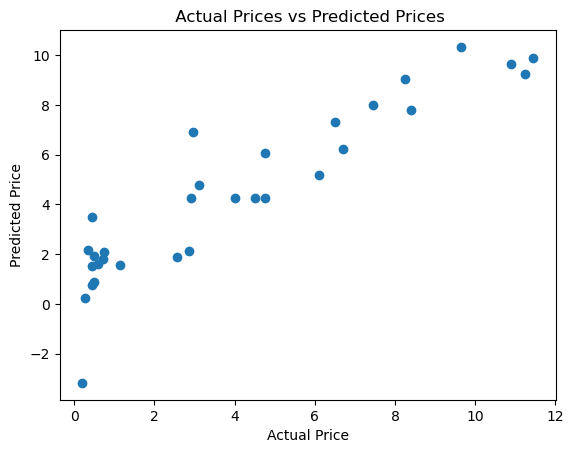

In [25]:
plt.scatter(y_test,y_prd)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [26]:
# prediction on Train data
y_prd1 = lr.predict(X_train)

In [27]:
from sklearn.metrics import r2_score

In [28]:
print ("Accuracy : ", r2_score(y_train,y_prd1))

Accuracy :  0.8799451660493699


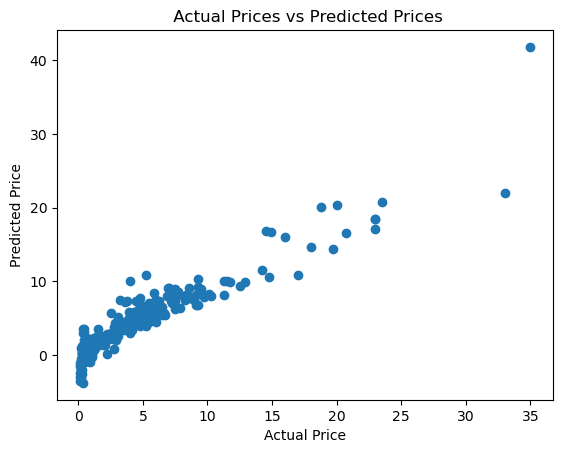

In [29]:
plt.scatter(y_train, y_prd1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
lr.predict([[2014,5.59,27000,0,0,0,0]]) 

C:\Users\Anas Rahaman Molla\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.83901354])